<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [221]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [222]:
#Create dictionary

with open('sat_scores.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)
    data = list(reader)

d = {}

for n in range(4):
    for key in data[0]:
        d[key] = [row[n] for row in data[1::]]
d

{'Math': ['510',
  '513',
  '515',
  '505',
  '516',
  '499',
  '499',
  '506',
  '500',
  '501',
  '499',
  '510',
  '499',
  '489',
  '501',
  '488',
  '474',
  '526',
  '499',
  '527',
  '499',
  '515',
  '510',
  '517',
  '525',
  '515',
  '542',
  '439',
  '539',
  '512',
  '542',
  '553',
  '542',
  '589',
  '550',
  '545',
  '572',
  '589',
  '580',
  '554',
  '568',
  '561',
  '577',
  '562',
  '596',
  '550',
  '570',
  '603',
  '582',
  '599',
  '551',
  '514'],
 'Rate': ['510',
  '513',
  '515',
  '505',
  '516',
  '499',
  '499',
  '506',
  '500',
  '501',
  '499',
  '510',
  '499',
  '489',
  '501',
  '488',
  '474',
  '526',
  '499',
  '527',
  '499',
  '515',
  '510',
  '517',
  '525',
  '515',
  '542',
  '439',
  '539',
  '512',
  '542',
  '553',
  '542',
  '589',
  '550',
  '545',
  '572',
  '589',
  '580',
  '554',
  '568',
  '561',
  '577',
  '562',
  '596',
  '550',
  '570',
  '603',
  '582',
  '599',
  '551',
  '514'],
 'State': ['510',
  '513',
  '515',
  '505',
 

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [223]:
sat = pd.read_csv('sat_scores.csv')
sat.dtypes


State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

In [224]:
sat2 = pd.DataFrame(d)
sat2.dtypes

Math      object
Rate      object
State     object
Verbal    object
dtype: object

The difference between creating a dataframe from a dictionary (line 361) and using the read_csv panda function is the content of the dataframe. The elements within the csv file will maintain it's type when using the read_csv panda function. However, the creating a dataframe from a dictionary will convert the elements into objects. This will pose issues during data cleaning and munging process.

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [225]:
sat.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [226]:
sat['State'].unique()

array(['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE',
       'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI',
       'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM',
       'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA',
       'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All'], dtype=object)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [227]:
#Checking the type of data for each column
sat.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

In [228]:
#Checking the data size
sat.shape

(52, 4)

In [229]:
#Checking if there are null values
sat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
State     52 non-null object
Rate      52 non-null int64
Verbal    52 non-null int64
Math      52 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


There are no null values within the DataFrame

In [230]:
#Familiarise with the column names
sat.columns

Index([u'State', u'Rate', u'Verbal', u'Math'], dtype='object')

In [231]:
sat.tail()

,State,Rate,Verbal,Math
47,IA,5,593,603
48,SD,4,577,582
49,ND,4,592,599
50,MS,4,566,551
51,All,45,506,514


The last row attempts to summarise the readings of each feature.
We will assess the findings in the 'All' row in order to identify if it's summary is correct by
removing the last row to ensure that the data analysis is not affected by the summary of the table

In [232]:
sats = sat.drop(51)

In [233]:
sats.describe()

,Rate,Verbal,Math
count,51.000000,51.000000,51.000000
mean,37.000000,532.529412,531.843137
std,27.550681,33.360667,36.287393
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,503.000000
50%,33.000000,527.000000,525.000000
75%,64.000000,562.000000,557.500000
max,82.000000,593.000000,603.000000


#### From the mean value of rate,math and verbal in the sats DataFrame, we observe that the mean are 37.0, 533 and 532. These number are not coherent with the values in the 'All' row. Therefore, we shall proceed to remove the last row of the sat DataFrame. 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

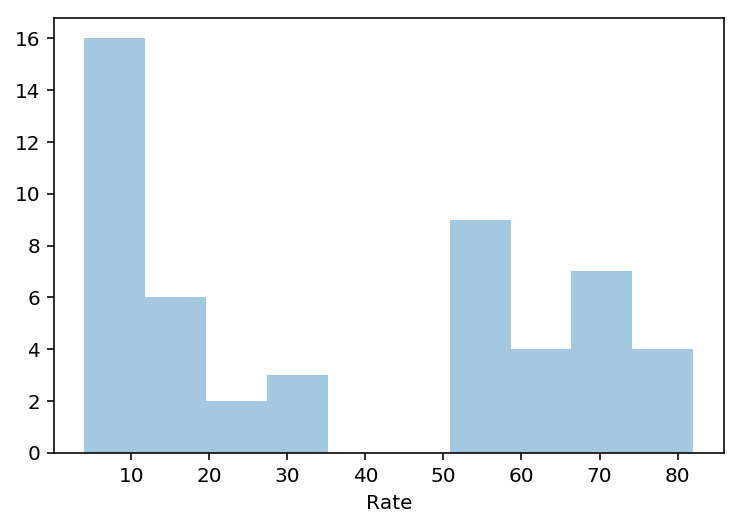

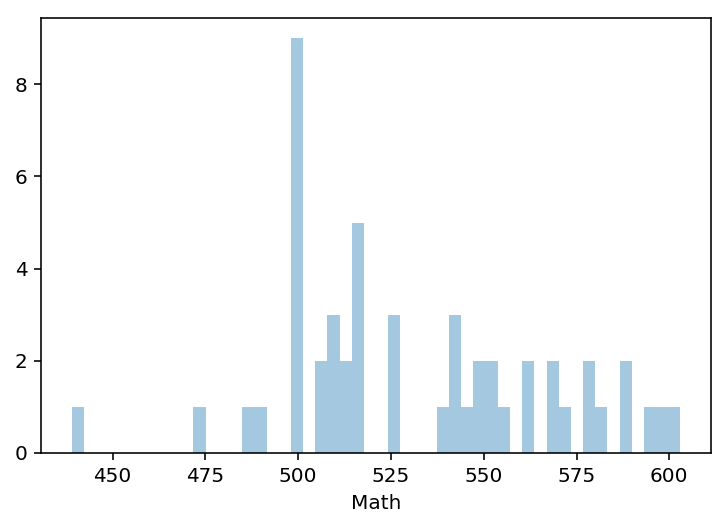

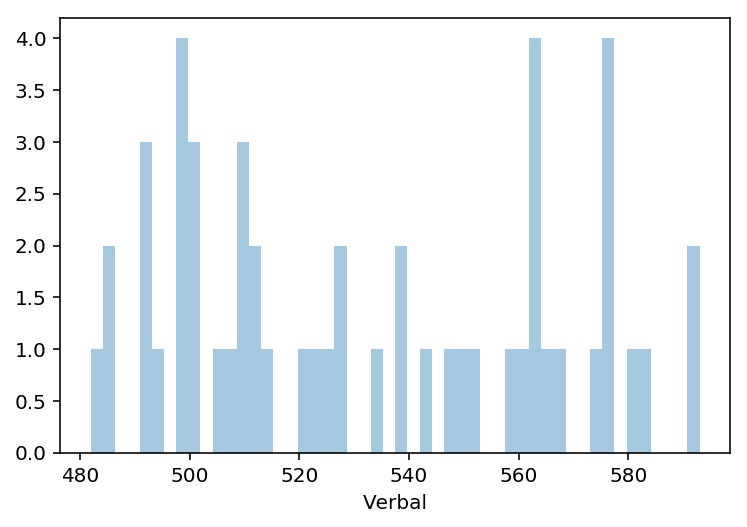

In [234]:
rate = sats['Rate']
sns.distplot(rate, bins= 10, kde=False)
plt.show()

math= sats['Math']
sns.distplot(math, bins= 50, kde=False)
plt.show()

verbal = sats['Verbal']
sns.distplot(verbal, bins= 50, kde=False)
plt.show()

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

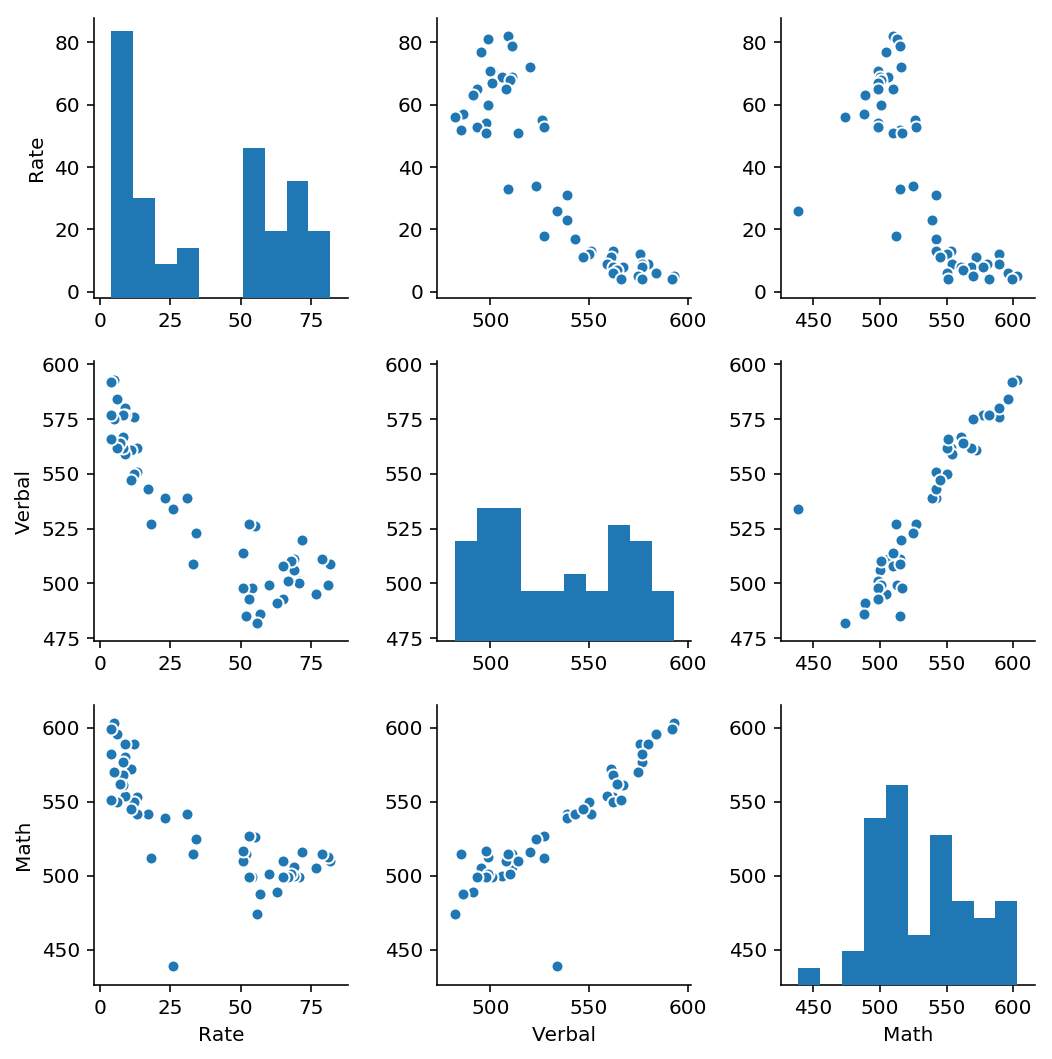

In [235]:
sns.pairplot(sats, diag_kind="hist")
plt.show()

The first row represent

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

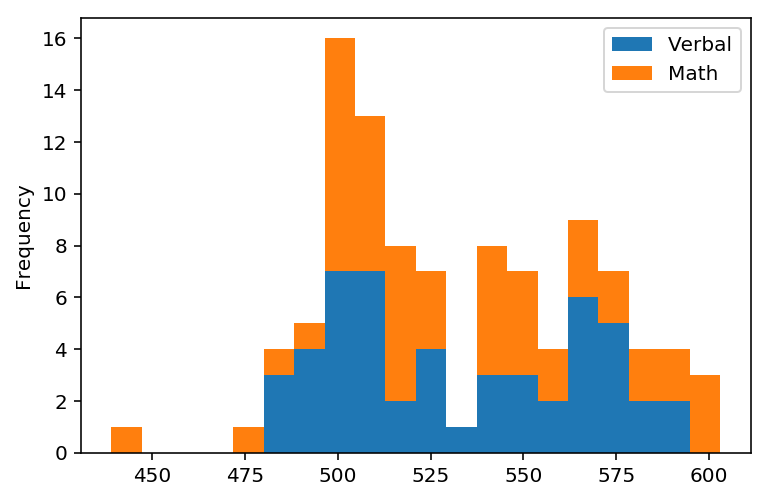

In [236]:
verbal_math = sats[['Verbal','Math']]
verbal_math.plot.hist(stacked=True, bins=20)


### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

The boxplot is capable of indicating the upper and lower limit, maximum value and minimum value. However, the scatterplot and histogram only gives us a generic idea of distribution of the data.

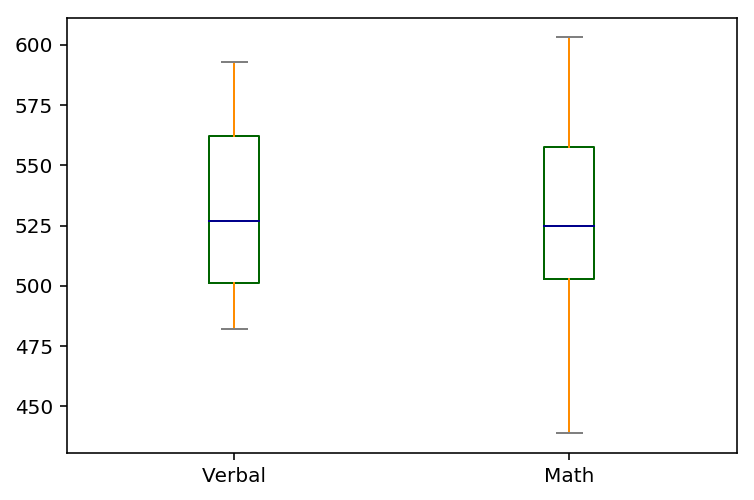

In [237]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange',medians='DarkBlue', caps='Gray')
verbal_math.plot.box(color=color, sym='r+')

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


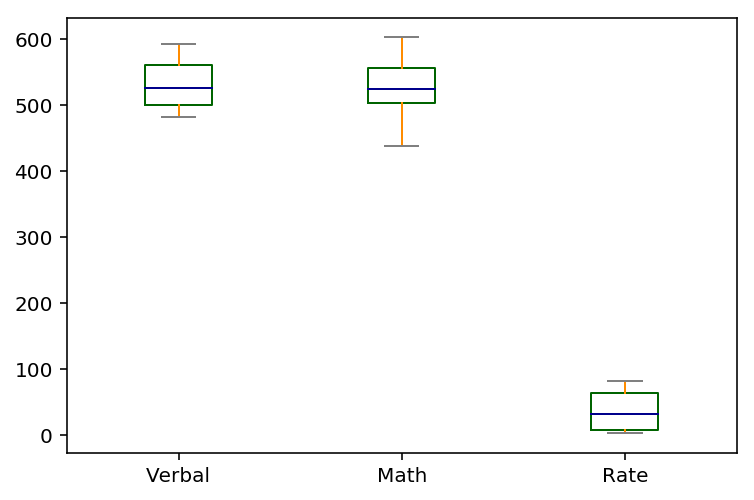

In [238]:
verbal_math_rate = sats[['Verbal','Math','Rate']]
color = dict(boxes='DarkGreen', whiskers='DarkOrange',medians='DarkBlue', caps='Gray')
verbal_math_rate.plot.box(color=color, sym='r+')

#### The boxplot is not right as rate is not on the same metric as verbal and maths. We will need to standardise the data.

In [239]:
#Rate descriptive data
rate_value = sats.Rate.values
rate_mean = np.mean(rate_value)
rate_std = np.std(rate_value)
print rate_mean, rate_std

37.0 27.2792386761


In [240]:
#Standardisation of rate
rate_stand = (rate_value - rate_mean) / rate_std
print np.mean(rate_stand), np.std(rate_stand)
# not exactly a mean of 0 but excruciatingly close

-8.70763156569e-18 1.0


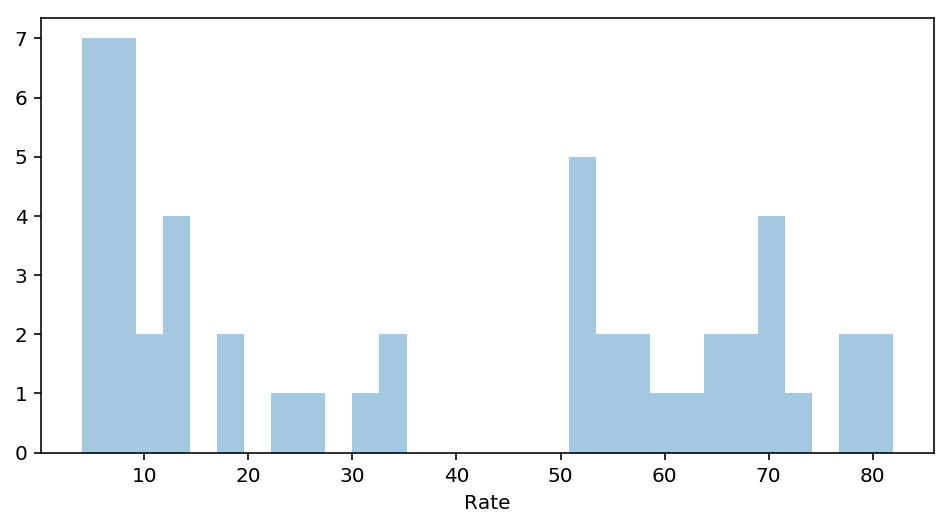

In [241]:
#Plot histogram to get observe any changes
fig = plt.figure(figsize=(8,4))
ax = fig.gca()

ax = sns.distplot(rate, bins=30, kde=False)
plt.show()

Notice that nothing changes about the distribution except for the location and the scale

In [242]:
#Maths descriptive data
math_value = sats.Math.values
math_mean = np.mean(math_value)
math_std = np.std(math_value)
print math_mean, math_std

531.843137255 35.9298731731


In [243]:
#Standardisation of math
math_stand = (math_value - math_mean) / math_std
print np.mean(math_stand), np.std(math_stand)
# not exactly a mean of 0 but excruciatingly close

-8.2722499874e-16 1.0


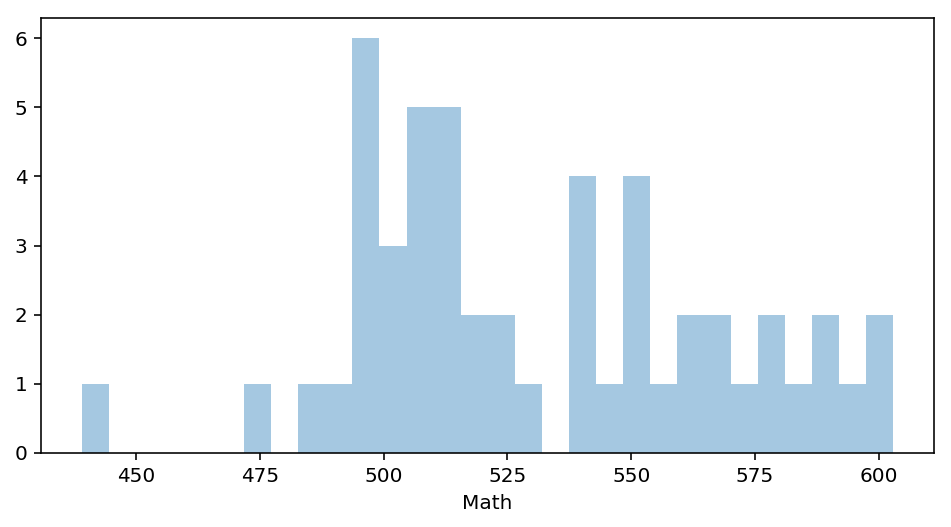

In [244]:
#Plot histogram to get observe any changes
fig = plt.figure(figsize=(8,4))
ax = fig.gca()

ax = sns.distplot(math, bins=30, kde=False)
plt.show()

In [245]:
#Verbal descriptive data
verbal_value = sats.Verbal.values
verbal_mean = np.mean(verbal_value)
verbal_std = np.std(verbal_value)
print verbal_mean, verbal_std

532.529411765 33.0319826842


In [246]:
#Standardisation of Verbal
verbal_stand = (verbal_value - verbal_mean) / verbal_std
print np.mean(verbal_stand), np.std(verbal_stand)
# not exactly a mean of 0 but excruciatingly close

8.09809735609e-16 1.0


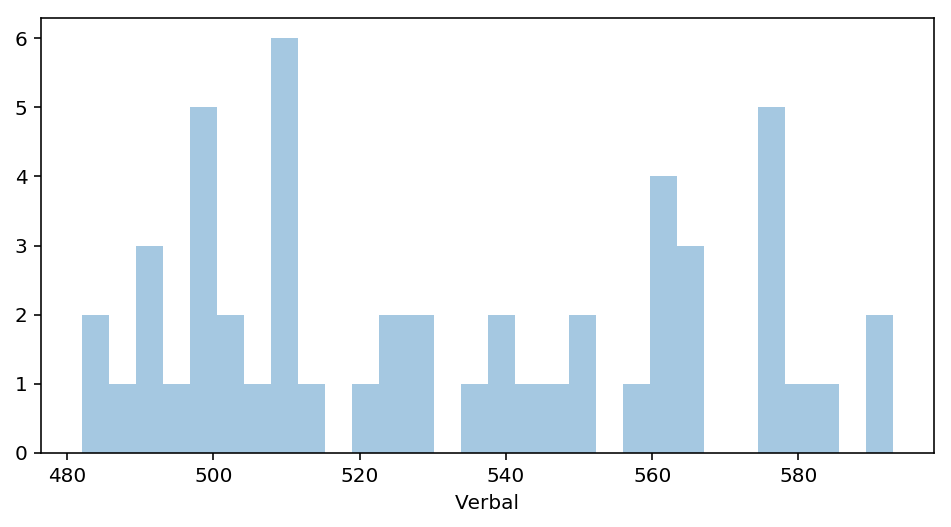

In [247]:
#Plot histogram to get observe any changes
fig = plt.figure(figsize=(8,4))
ax = fig.gca()

ax = sns.distplot(verbal, bins=30, kde=False)
plt.show()

In [248]:
sats.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


In [249]:
sats_without_state = sats.drop(['State'],axis=1)

In [250]:
sats_without_state.head()

,Rate,Verbal,Math
0,82,509,510
1,81,499,513
2,79,511,515
3,77,495,505
4,72,520,516


In [251]:
sats_without_state_stand = (sats_without_state - sats_without_state.mean()) / sats_without_state.std()

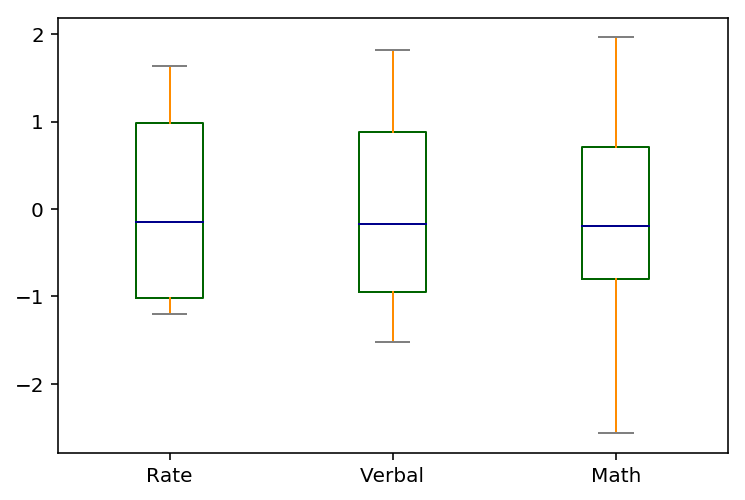

In [252]:
sats_without_state_stand.plot.box(color=color, sym='r+')



<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [253]:
verbal_mean = sats['Verbal'].mean()
print verbal_mean
sats.loc[sats['Verbal'] > verbal_mean]

532.529411765


,State,Rate,Verbal,Math
26,CO,31,539,542
27,OH,26,534,439
28,MT,23,539,539
30,ID,17,543,542
31,TN,13,562,553
32,NM,13,551,542
33,IL,12,576,589
34,KY,12,550,550
35,WY,11,547,545
36,MI,11,561,572


In [254]:
sats.loc[sats['Verbal'] > verbal_mean].count()

State     24
Rate      24
Verbal    24
Math      24
dtype: int64

## There are a total of 24 states that above the mean score of the verbal test. Therefore, the distribution is considerably normally distributed.

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [255]:
verbal_median = sats['Verbal'].median() 
print verbal_median
sats[sats['Verbal'] > verbal_median]




527.0


,State,Rate,Verbal,Math
26,CO,31,539,542
27,OH,26,534,439
28,MT,23,539,539
30,ID,17,543,542
31,TN,13,562,553
32,NM,13,551,542
33,IL,12,576,589
34,KY,12,550,550
35,WY,11,547,545
36,MI,11,561,572


In [256]:
sats[sats['Verbal'] > verbal_median].count()

State     24
Rate      24
Verbal    24
Math      24
dtype: int64

## There are a total of 24 states that above the median score of the verbal test. It is similar to list of state which are above the mean score of the verbal test. This is so as the distribution of the scores are normally distributed.

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [257]:
sats['diff_verbal_math'] = sats['Verbal'] - sats['Math']
sats.head(5)

,State,Rate,Verbal,Math,diff_verbal_math
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

#### Question 5.4.1 and 5.4.3(A)

In [258]:
state_diff_score = sats[['State','diff_verbal_math']]
top_3_verbal = state_diff_score.sort_values('diff_verbal_math').head(9)
print 'The states is ' + top_3_verbal.State.head(3)

21    The states is HI
23    The states is CA
1     The states is NJ
Name: State, dtype: object


#### Question 5.4.2


In [259]:
top_3_math = state_diff_score.sort_values('diff_verbal_math').tail(9)
print 'The state is ' +  top_3_math.State.head(3)

41    The state is OK
16    The state is DC
32    The state is NM
Name: State, dtype: object


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [260]:
# Create dataframe to analyse the different factors on a heat map
features = sats[['Math','Verbal', 'Rate']]

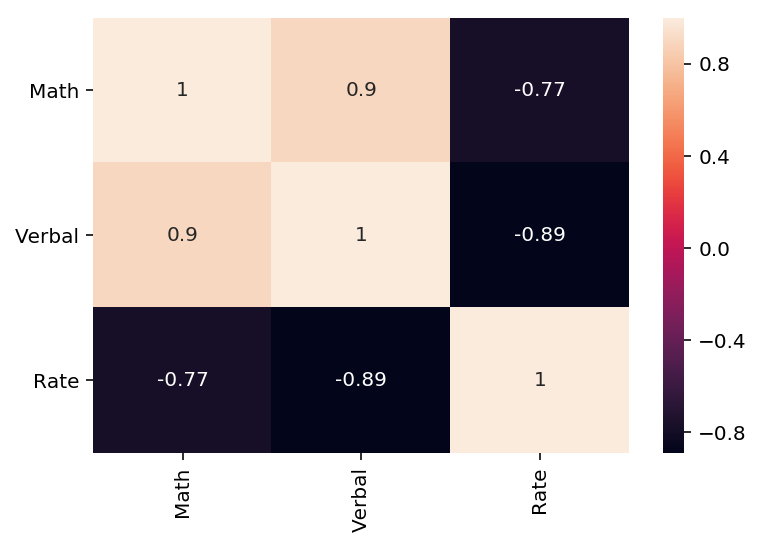

In [261]:
# create correlation data
correlation = features.corr()

# plot heatmap
ax = sns.heatmap(correlation, annot=True)

# turn the axis label
for item in ax.get_yticklabels():
    item.set_rotation(0)

for item in ax.get_xticklabels():
    item.set_rotation(90)

#### Based on the absolute value of the pearson correlation value, we observe high correlation between two sets of groups: Verbal and Maths scores (0.9) and, Verbal scores and Rate of passes(-0.89). This implies that candidates with high verbal scores are highly likely in attain high maths scores. Whereas, candidates with high verbal scores are highly likely to attain a low rate or vice versa.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [262]:
math.describe()

count     51.000000
mean     531.843137
std       36.287393
min      439.000000
25%      503.000000
50%      525.000000
75%      557.500000
max      603.000000
Name: Math, dtype: float64

#### Based on the data of the 50 states, we observe that the mean math score of the country is 532 with a minimum score of 439 and maximum score of 603.Those in the upper percentile will score more than 558.

In [263]:
verbal.describe()

count     51.000000
mean     532.529412
std       33.360667
min      482.000000
25%      501.000000
50%      527.000000
75%      562.000000
max      593.000000
Name: Verbal, dtype: float64

#### Based on the data of the 50 states, we observe that the mean verbal score of the country is 533 with a minimum score of 482 and maximum score of 593. Those in the upper percentile will score more than 593.

In [264]:
rate.describe()

count    51.000000
mean     37.000000
std      27.550681
min       4.000000
25%       9.000000
50%      33.000000
75%      64.000000
max      82.000000
Name: Rate, dtype: float64

#### Based on the data of the 50 states, we observe that the mean rate of the country is 37 with a minimum rate of 4 and maximum score of 82. Those in the upper percentile will rate more than 64.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

## 6.3.1 & 6.3.2
The covariance matrix indicates "relatedness" between variables. It is literally the sum of deviations from the mean of  X times deviations from the mean of  Y adjusted by the sample size  N.
### $$ \text{covariance}(X, Y) = \sum_{i=1}^N \frac{(X - \bar{X})(Y - \bar{Y})}{N}$$
From the formula above, it is challenging in deducing what the value means as X and Y might have different units.
Therefore, we rely on the correlation matrix helps normalise the covariance by dividing it with the standard deviation:
### $$ \text{pearson correlation}\;r = cor(X, Y) =\frac{cov(X, Y)}{std(X)std(Y)}$$
The correlation matrix allows us to easily interprete the "relatedness" on a scale of -1 to 1 as it takes the diversity of the data into account.

## 6.3.3


The correlation matrix is much more effective in assessing the the relationship between the two different variables as it the deviations of both variables will be taken into account. 

In [265]:
covariance = features.cov()
print covariance

               Math       Verbal    Rate
Math    1316.774902  1089.404706 -773.22
Verbal  1089.404706  1112.934118 -816.28
Rate    -773.220000  -816.280000  759.04


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [346]:
#Load the data using pandas
drug = pd.read_csv('drug-use-by-age.csv')
drug

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


### Data quality check :
### 1) No null values 
### 2) Check Columns labels 
### 3) Check dtypes of the columns


In [347]:
# Ensure that there are no null values
drug.isnull().sum()

age                        0
n                          0
alcohol-use                0
alcohol-frequency          0
marijuana-use              0
marijuana-frequency        0
cocaine-use                0
cocaine-frequency          0
crack-use                  0
crack-frequency            0
heroin-use                 0
heroin-frequency           0
hallucinogen-use           0
hallucinogen-frequency     0
inhalant-use               0
inhalant-frequency         0
pain-releiver-use          0
pain-releiver-frequency    0
oxycontin-use              0
oxycontin-frequency        0
tranquilizer-use           0
tranquilizer-frequency     0
stimulant-use              0
stimulant-frequency        0
meth-use                   0
meth-frequency             0
sedative-use               0
sedative-frequency         0
dtype: int64

#### We can observe that there are no null values in the EDA data set.

In [348]:
drug.columns

Index([u'age', u'n', u'alcohol-use', u'alcohol-frequency', u'marijuana-use',
       u'marijuana-frequency', u'cocaine-use', u'cocaine-frequency',
       u'crack-use', u'crack-frequency', u'heroin-use', u'heroin-frequency',
       u'hallucinogen-use', u'hallucinogen-frequency', u'inhalant-use',
       u'inhalant-frequency', u'pain-releiver-use', u'pain-releiver-frequency',
       u'oxycontin-use', u'oxycontin-frequency', u'tranquilizer-use',
       u'tranquilizer-frequency', u'stimulant-use', u'stimulant-frequency',
       u'meth-use', u'meth-frequency', u'sedative-use', u'sedative-frequency'],
      dtype='object')

#### We replace the '-' in the columns of the drug dataframe as it would be perceived as the subtraction arithmetic operation when we cast a method. Therefore, it would be replace with a '_'. From the columns names above, we can observe that 'pain-releiver' and 'oxycontin' is spelled wrongly. 

In [349]:
# List Replacement Method
new_names = ['age', 'n','alcohol_use', 'alcohol_frequency', 'marijuana_use',
        'marijuana_frequency', 'cocaine_use', 'cocaine_frequency',
        'crack_use', 'crack_frequency', 'heroin_use', 'heroin_frequency',
        'hallucinogen_use', 'hallucinogen_frequency', 'inhalant_use',
        'inhalant_frequency', 'painrelieve_use', 'painrelieve_frequency',
        'oxycontin_use', 'oxycontin_frequency', 'tranquilizer_use',
        'tranquilizer-frequency', 'stimulant_use', 'stimulant_frequency',
        'meth_use', 'meth_frequency', 'sedative_use', 'sedative_frequency']
drug.columns = new_names
drug.head()

,age,n,alcohol_use,alcohol_frequency,marijuana_use,marijuana_frequency,cocaine_use,cocaine_frequency,crack_use,crack_frequency,...,oxycontin_use,oxycontin_frequency,tranquilizer_use,tranquilizer-frequency,stimulant_use,stimulant_frequency,meth_use,meth_frequency,sedative_use,sedative_frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


#### We add a new column at the front of the table to understand the age proportion within the study. This will help us understand the age distribution amongst the various types of drug use.

In [350]:
new_col = (drug['n']/sum(drug['n'])*100)
idx = 2
drug.insert(loc=idx, column='age_percentage', value=new_col)
drug.head(2)

,age,n,age_percentage,alcohol_use,alcohol_frequency,marijuana_use,marijuana_frequency,cocaine_use,cocaine_frequency,crack_use,...,oxycontin_use,oxycontin_frequency,tranquilizer_use,tranquilizer-frequency,stimulant_use,stimulant_frequency,meth_use,meth_frequency,sedative_use,sedative_frequency
0,12,2798,5.062604,3.9,3.0,1.1,4.0,0.1,5.0,0.0,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,4.988420,8.5,6.0,3.4,15.0,0.1,1.0,0.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0


#### We are going to make a new data set without the age column as some of the age groups and it would be easier to process the data in the other process.

In [351]:
druggie = drug.drop(['age'], axis=1)
druggie.head(2)

,n,age_percentage,alcohol_use,alcohol_frequency,marijuana_use,marijuana_frequency,cocaine_use,cocaine_frequency,crack_use,crack_frequency,...,oxycontin_use,oxycontin_frequency,tranquilizer_use,tranquilizer-frequency,stimulant_use,stimulant_frequency,meth_use,meth_frequency,sedative_use,sedative_frequency
0,2798,5.062604,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,2757,4.988420,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0


### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

#### To understand the relationships between variables, we will visualise the data in the form of a heat map and boxplot. The box plot is use to identify the outliers whereas the heat map will point us to the more closely related variables. 

#### Before doing so, we must separate the data points into two groups: 1) Drug use and 2) Drug Frequency

In [352]:
# The n column is dropped because do not measure the drug use on a percentage scale. 
drug_only = drug.drop(['n'], axis=1)

In [353]:
use_drug = list(drug_only.columns[::2])
use = drug_only[use_drug]

In [354]:
freq_drug = list(drug_only.columns[1::2])
freq = drug_only[freq_drug]

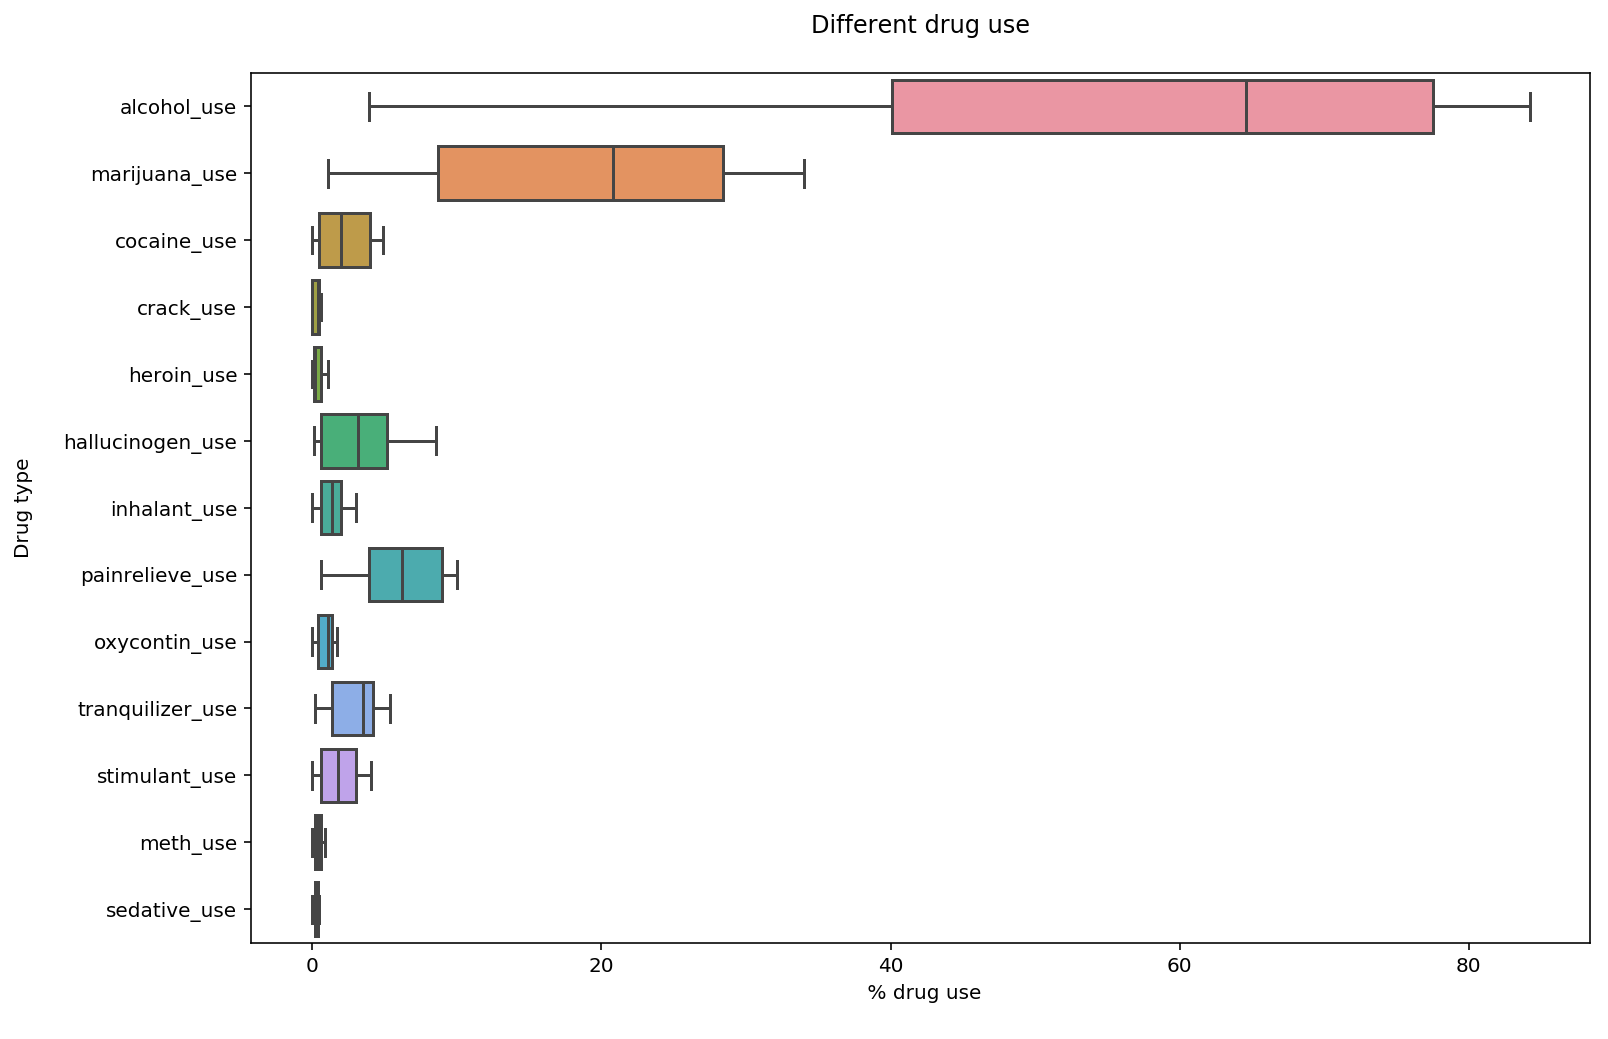

In [355]:
#Configure the shape of the boxplot
fig = plt.figure(figsize=(12,8))
ax = fig.gca()

# Plot the boxplot
ax = sns.boxplot(data=use, orient='h', ax=ax)

# Add titles and axes labels to the boxplot
ax.set_title('Different drug use\n')
plt.xlabel(' % drug use\n')
plt.ylabel('Drug type\n')

# Display the boxplot
plt.show()

#### The drug use boxplot tells us that there are no outliers. Alcohol and marijuana use is much more widely used than the other drugs.

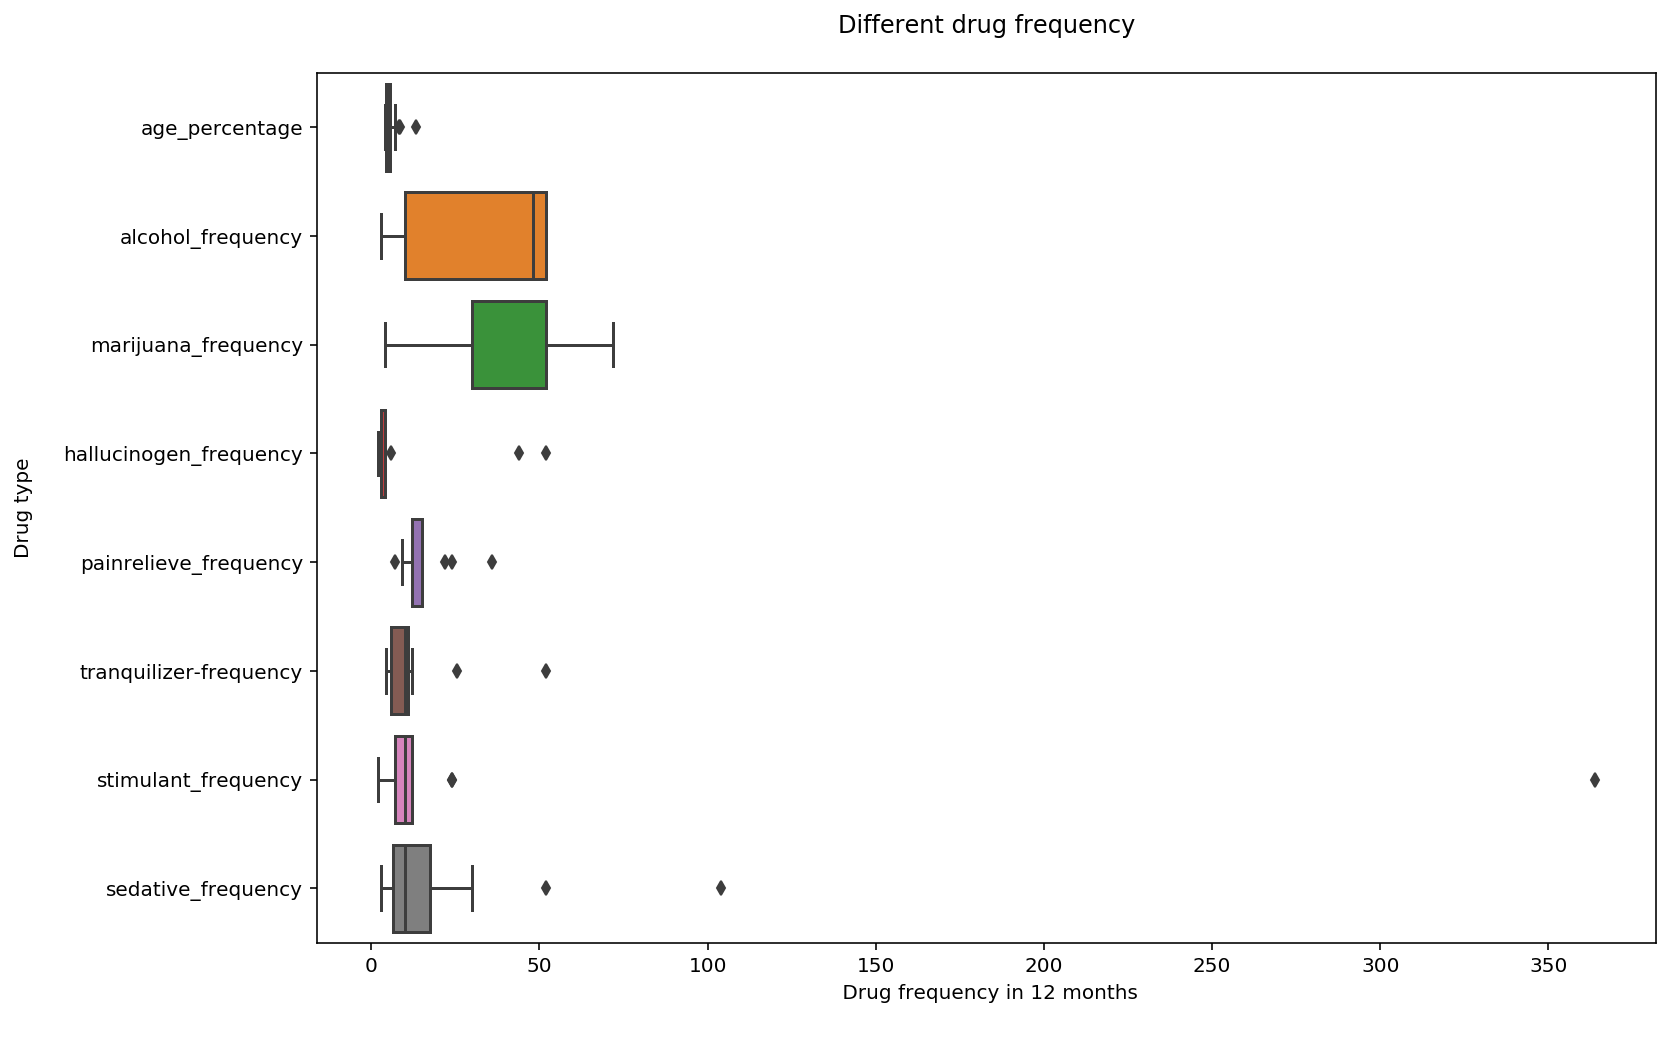

In [356]:
#Configure the shape of the boxplot
fig = plt.figure(figsize=(12,8))
ax = fig.gca()

# Plot the boxplot
ax = sns.boxplot(data=freq, orient='h', ax=ax)

# Add titles and axes labels to the boxplot
ax.set_title('Different drug frequency\n')
plt.xlabel(' Drug frequency in 12 months\n')
plt.ylabel('Drug type\n')

# Display the boxplot
plt.show()

#### The drug frequency boxplot tells us that there are outliers in the hallucinogen, pain reliever, tranquilizer, stimulant and sedative category. Alcohol and marijuana frequency remains to be much more widely used than the other drugs.

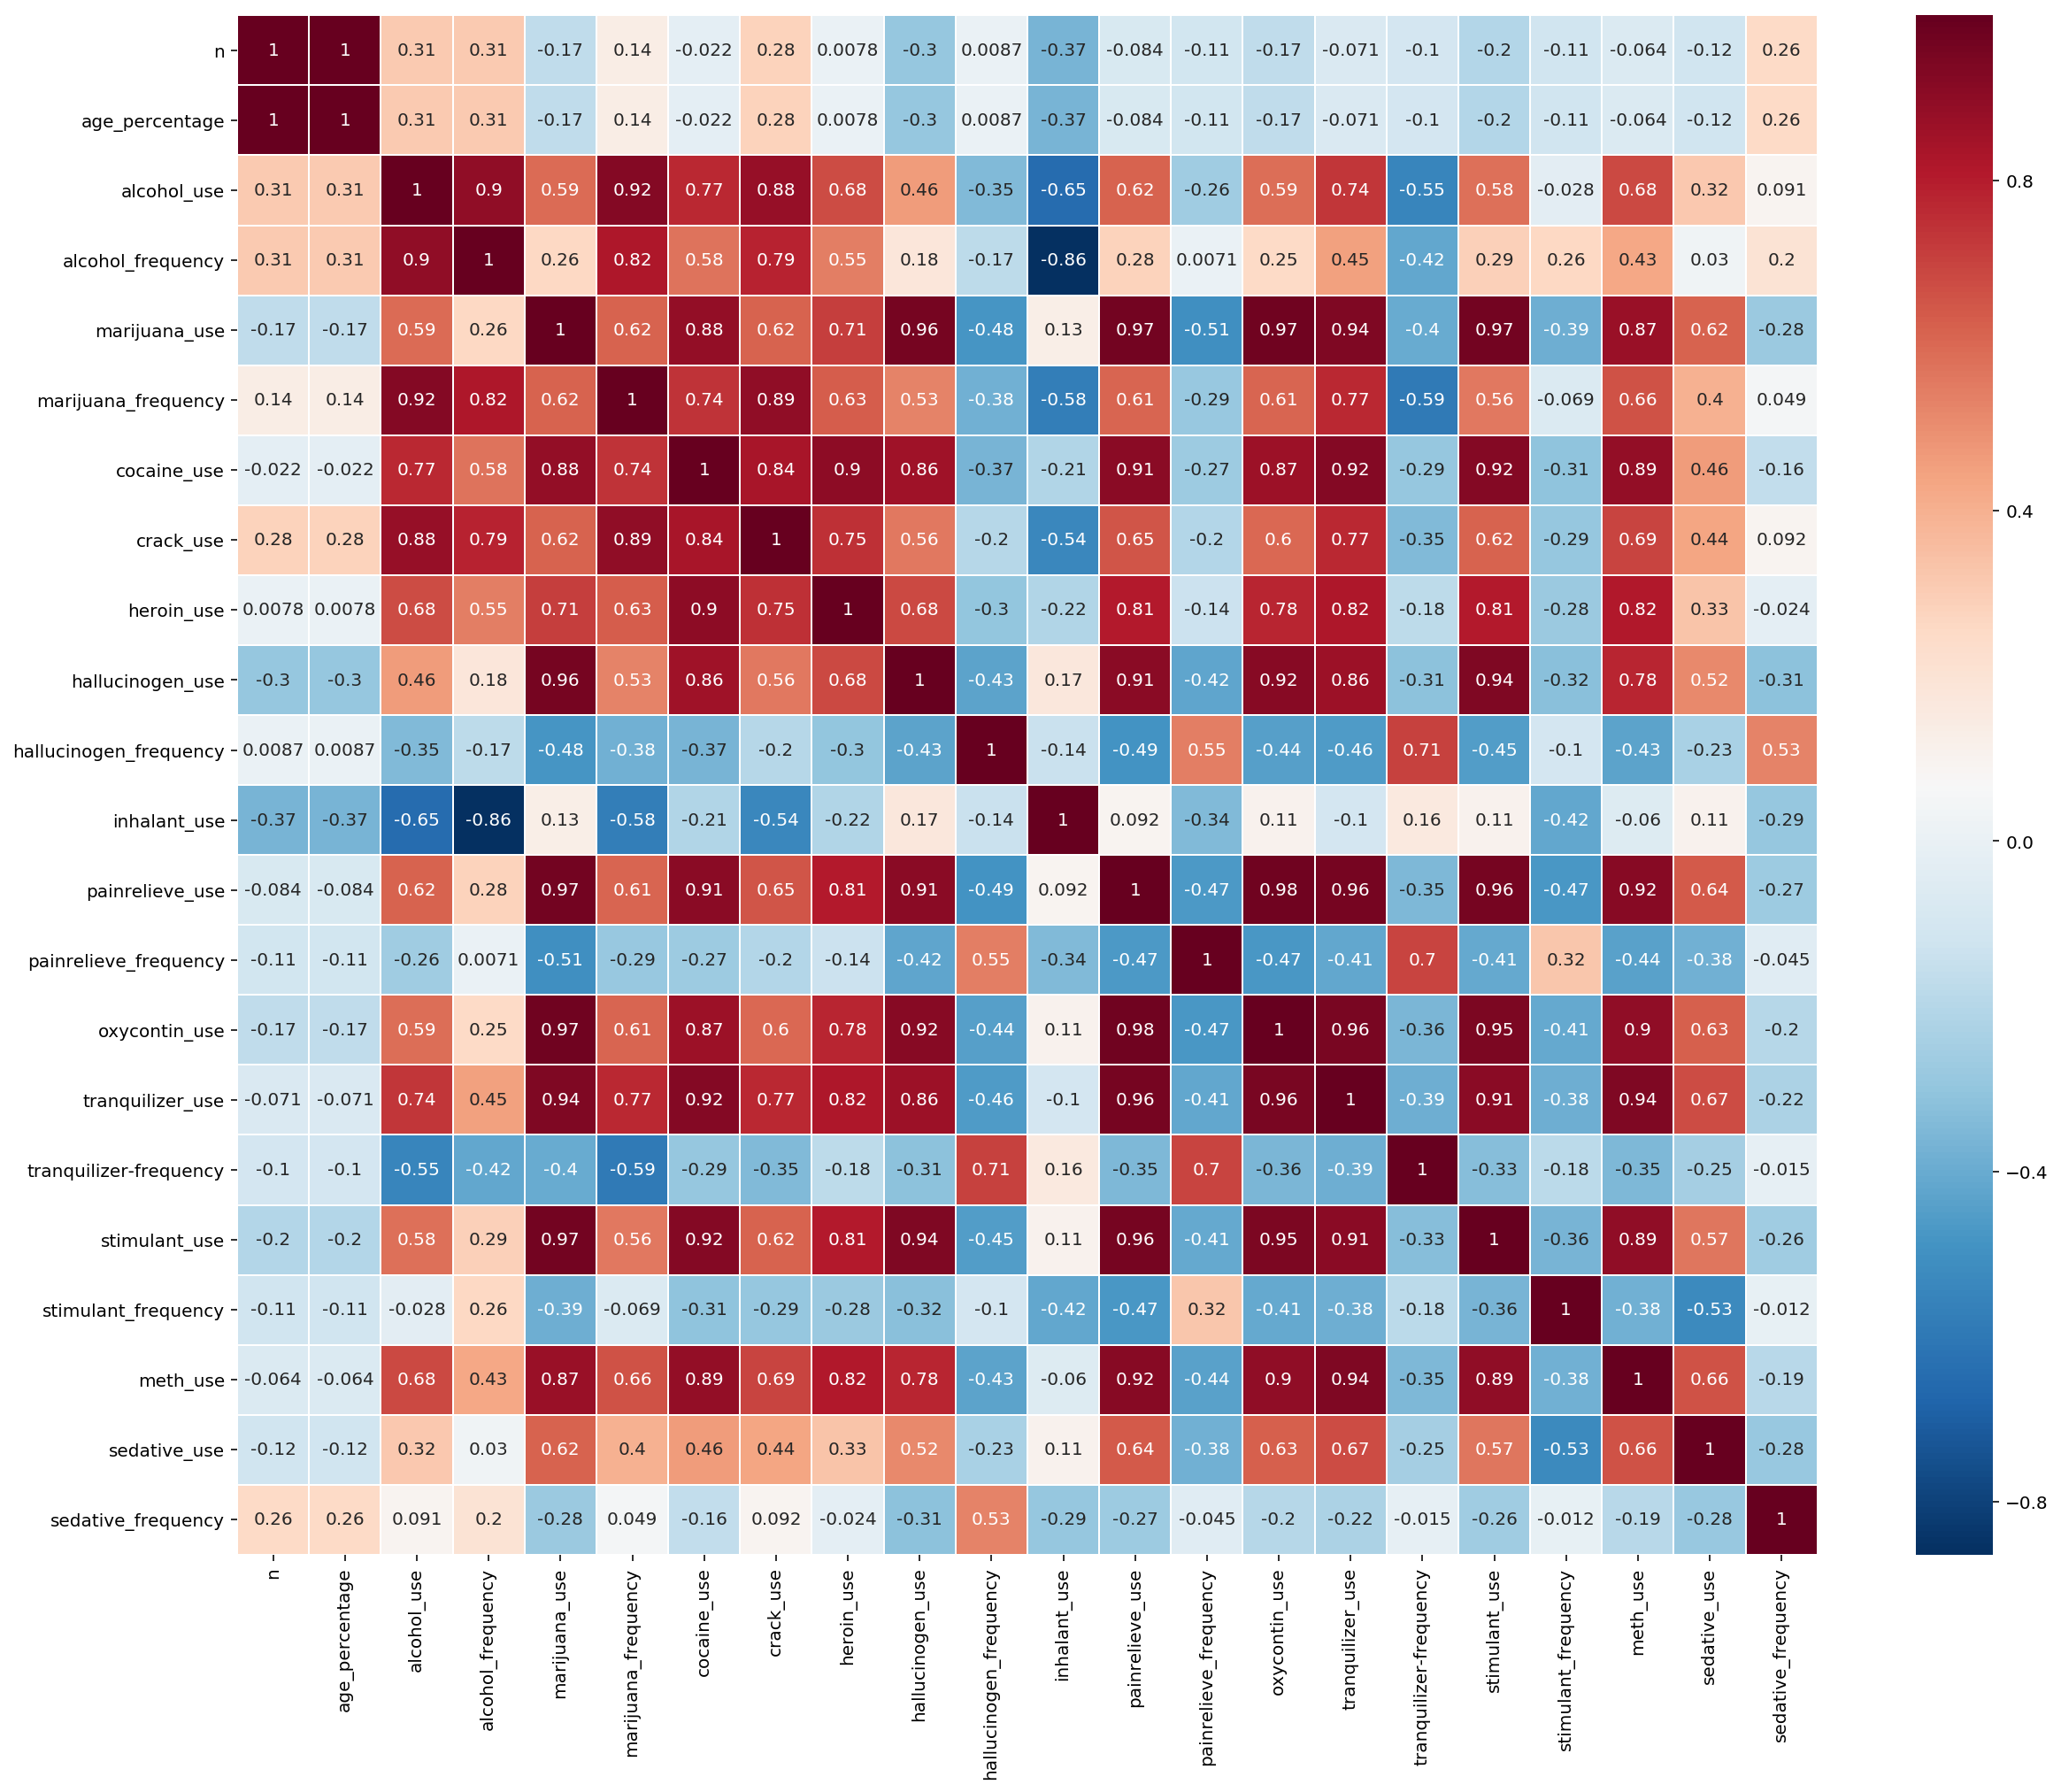

In [357]:
# create correlation data
plt.figure(figsize=(20,16))
drug_correlation = drug.corr()

# plot heatmap
ax = sns.heatmap(drug_correlation, linewidth=0.5, cmap="RdBu_r", annot=True)

# turn the axis label
for item in ax.get_yticklabels():
    item.set_rotation(0)

for item in ax.get_xticklabels():
    item.set_rotation(90)

### Based on the EDA correlation heatmap, we see a strong positive correlation between ( above 0.95) within the usage of certain drugs:
#### 1) Stimulant and marijuana use
#### 2) Oxytocin and marijuana use
#### 3) Hallucinogen and marijuana use
#### 4) Pain-reliever and marijuana use
#### 5) Oxytocin and pain-reliever use
#### 6) Stimulant and pain-reliever use
#### 7) Tranquilizer and pain-reliever use
#### 8) Stimulant and oxytocin use
#### 9) Tranquilizer and oxytocin use

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question **
Is there a difference between the mean percentage of oxytocin and pain-reliever use. 
** Deliverables **
1) Mean percentage of oxytocin use
2) Mean percentage of pain-reliever use
3) t-statistic
4) p-value

<a id='null-hypothesis'></a>

### The "null hypothesis"

---

The **null hypothesis** is a fundamental concept of Frequentist statistical tests. We typically denote the null hypothesis with **H0**. 

Users are using oxycontin and pain-reliever concurrently. 

> **H0:** The mean difference between the pain-reliever and oxytocin use is zero.

<a id='alternative-hypothesis'></a>

### The "alternative hypothesis"

---

The **alternative hypothesis** is the outcome of the experiment that we hope to show. In our example the alternative hypothesis is that there is in fact a mean difference in oxycontin and pain-reliever use. 

> **H1:** The parameter of interest, our mean difference between oxytocin and pain-reliever use, is different than zero.

**NOTE:** The null hypothesis and alternative hypothesis are concerned with the true values, or in other words the *parameter of the overall population*. Through the process of experimentation / hypothesis testing and statistical analysis of the results we will make an *inference* about this population parameter.

In [361]:
mean2 = drug['oxycontin_use'].mean()
distri_2 = drug['oxycontin_use'] - mean2

In [321]:
mean1 = drug['painrelieve_use'].mean()
distri_1 = drug['painrelieve_use'] - mean1

In [319]:
mean_difference = mean1 - mean2
mean_difference

5.3352941176470585

<a id='t-tests'></a>

### Evaluating our experiment with a t-test and p-value

---

Say in our experiment we measure the following results:

- The subjects in the oxycontin group have mean percentage of 0.935
- The subjects in the pain-reliever group have mean percentage of 6.271

The difference between ooxycontin and pain-reliever groups is 5.336% . We can perform what is known as a **t-test** to evaluate this.

First we will calculate a **t-statistic**. The t-statistic is a measure of the degree to which our groups differ standardized by the variance of our measurements.

Secondly we will calculate a **p-value**. The p-value is a metric that indicates a probability that our measured difference was due to random chance in the sampling of subjects.




<a id='likelihood-data'></a>

### The likelihood of the data given the null hypothesis 

---

For our experiment we will set up a null hypothesis and an alternative hypothesis:

> **H0:** The difference between in pain-reliever and oxycontin use is 0.

> **H1:** The difference between in pain-reliever and oxycontin use is not 0.

Likewise, our measured difference is **5.336**.

Recall that as Frequentists we want to know:

### $$P(\text{data}\;|\;\text{mean difference})$$

**What is the probability that we observed this data GIVEN a specified mean difference in oxytocin use.**

We obviously don't know the true mean difference in oxycontin use resulting from the drug. The whole point of conducting the experiment is to evaluate the drug. **Instead we will assume that the true mean difference is zero: the null hypothesis H0 is assumed to be true:**

### $$P(\text{data}\;|\;\text{mean difference}=0)$$

In [367]:
#95% confidence level
alpha = 0.05
import scipy.stats as stats
results  = stats.ttest_ind(distri_1, distri_2, equal_var=False)

if results.pvalue < (alpha/2):
    print 'As p-value={results.pvalue} is less than {alpha/2}, we reject the null hypothesis and conclude that the mean difference between oxycontin and pain-reliever is not 0'
else: 
    print 'As p-value={results.pvalue} is less than {alpha/2}, we do not reject the null hypothesis'

As p-value={results.pvalue} is less than {alpha/2}, we do not reject the null hypothesis


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

### 8.1.1 and 8.1.2
#### An outliers is a data point which is numerically distant from the majority of the data point.


In [372]:
sat['Rate']

0     82
1     81
2     79
3     77
4     72
5     71
6     71
7     69
8     69
9     68
10    67
11    65
12    65
13    63
14    60
15    57
16    56
17    55
18    54
19    53
20    53
21    52
22    51
23    51
24    34
25    33
26    31
27    26
28    23
29    18
30    17
31    13
32    13
33    12
34    12
35    11
36    11
37     9
38     9
39     9
40     8
41     8
42     8
43     7
44     6
45     6
46     5
47     5
48     4
49     4
50     4
51    45
Name: Rate, dtype: int64

In [373]:
rate.describe()




count    51.000000
mean     37.000000
std      27.550681
min       4.000000
25%       9.000000
50%      33.000000
75%      64.000000
max      82.000000
Name: Rate, dtype: float64

##### Since the maximum value is no more than two standard deviation away from the mean, we are able to conclude that there are no outliers. It is not necessary to remove any data point.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [364]:
stats.pearsonr(sat['Verbal'], sat['Math'])

(0.899870852544429, 1.1920026733067679e-19)

In [374]:
verbal_math.corr()

,Verbal,Math
Verbal,1.000000,0.899909
Math,0.899909,1.000000


#### The similarity between pearson and spearman correlation coefficient are that they are both range between -1 to 1. However pearson correlation coefficient tells us the how closely related the two variables. While the spearman correlation coefficient is based on the rank order of the variable and it's measure quantity.


### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [341]:
sat['percentile'] = sat['Rate'].map(lambda x: stats.percentileofscore(sat['Rate'],x))
sat.head()

,State,Rate,Verbal,Math,percentile
0,CT,82,509,510,100.000000
1,NJ,81,499,513,98.076923
2,MA,79,511,515,96.153846
3,NY,77,495,505,94.230769
4,NH,72,520,516,92.307692


In [342]:
sat[sat['State']== 'LA']

,State,Rate,Verbal,Math,percentile
43,LA,7,564,562,15.384615


### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

### 9.3.1
#### It would be able to point where the outlier is on the percentile range

### 9.3.2

Text(0.5,0,u'Frequency of Simulant')

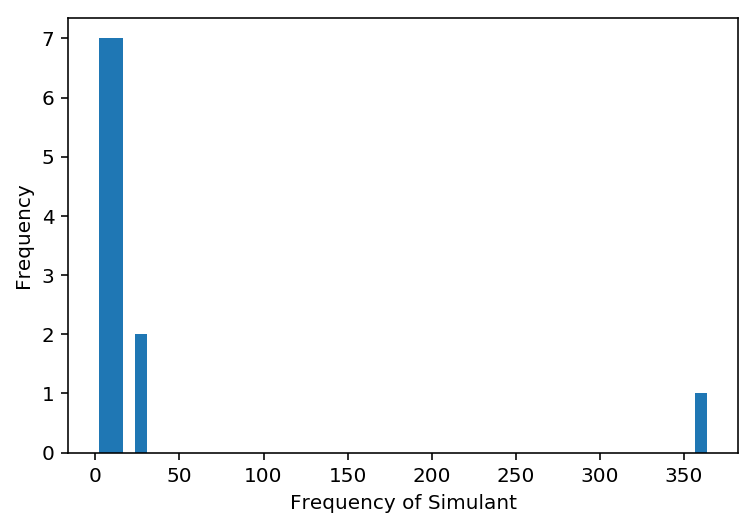

In [343]:
ax = drug['stimulant_frequency'].plot.hist(bins=50)
ax.set_xlabel('Frequency of Simulant')

In [366]:
### 9.3.3

Text(0,0.5,u'Frequency')

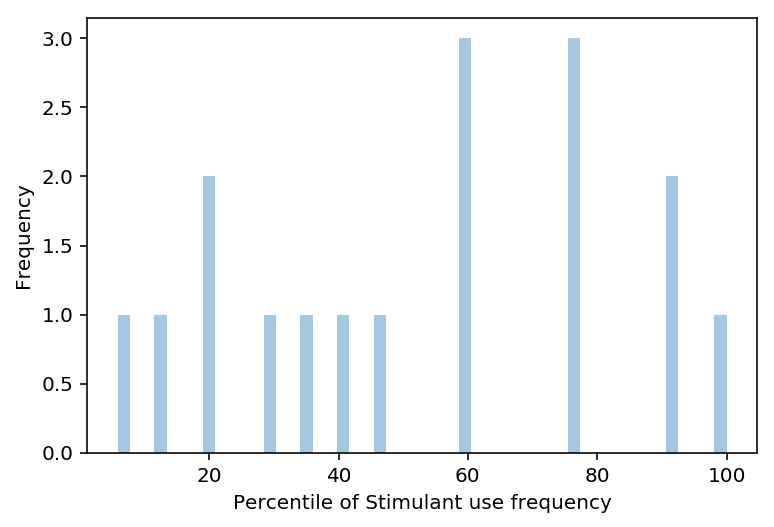

In [344]:
stim_per = []
for n in drug['stimulant_frequency']:
    stim_per.append(stats.percentileofscore(drug['stimulant_frequency'],n))
ax = sns.distplot(stim_per, kde=False, bins=50)
ax.set_xlabel('Percentile of Stimulant use frequency')
ax.set_ylabel('Frequency')

#### We are able to clearly see where the outlier is with respect to majority of the data.